In [176]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. 
##    Provide visualizations and summary statistics of the variables. 
##    Pre process the data to apply the MLR.

In [177]:
# loading the csv file
data = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\MLR\MLR\ToyotaCorolla - MLR.csv")

In [178]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [179]:
df = data[["Price","Age_08_04","KM","HP","Automatic","cc","Doors","Cylinders","Gears","Weight"]]
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [180]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [181]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Price        0
Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


### Histograms for each numerical variable to understand their distributions.

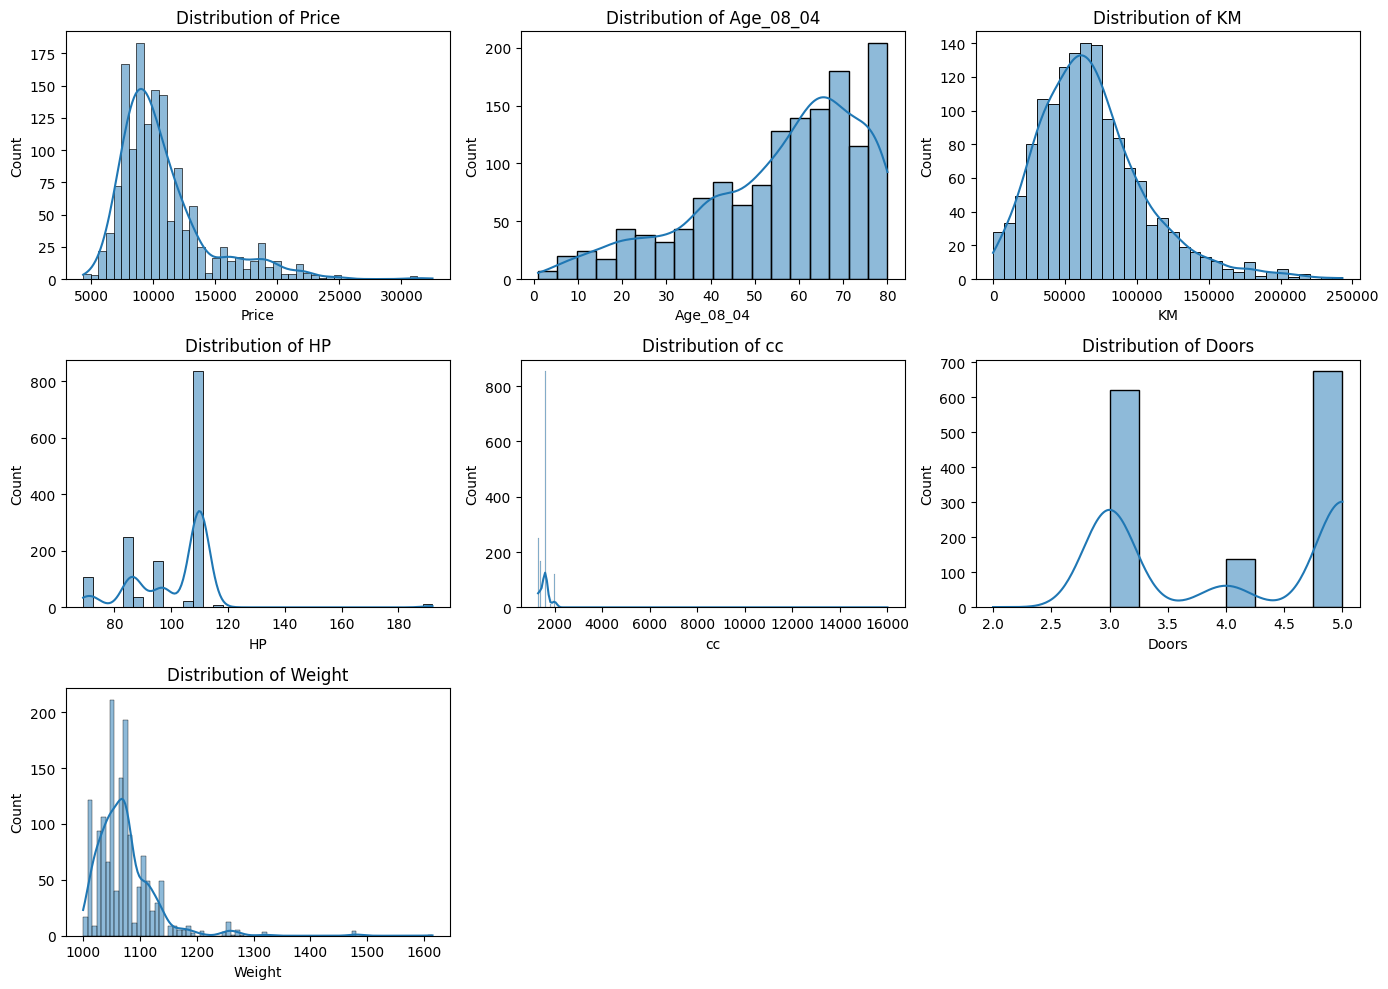

In [182]:
plt.figure(figsize=(14, 10))
# List of columns to plot
cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
# Create histograms
for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Scatter plots to visualize relationships between the dependent variable (Price) and each independent variable.

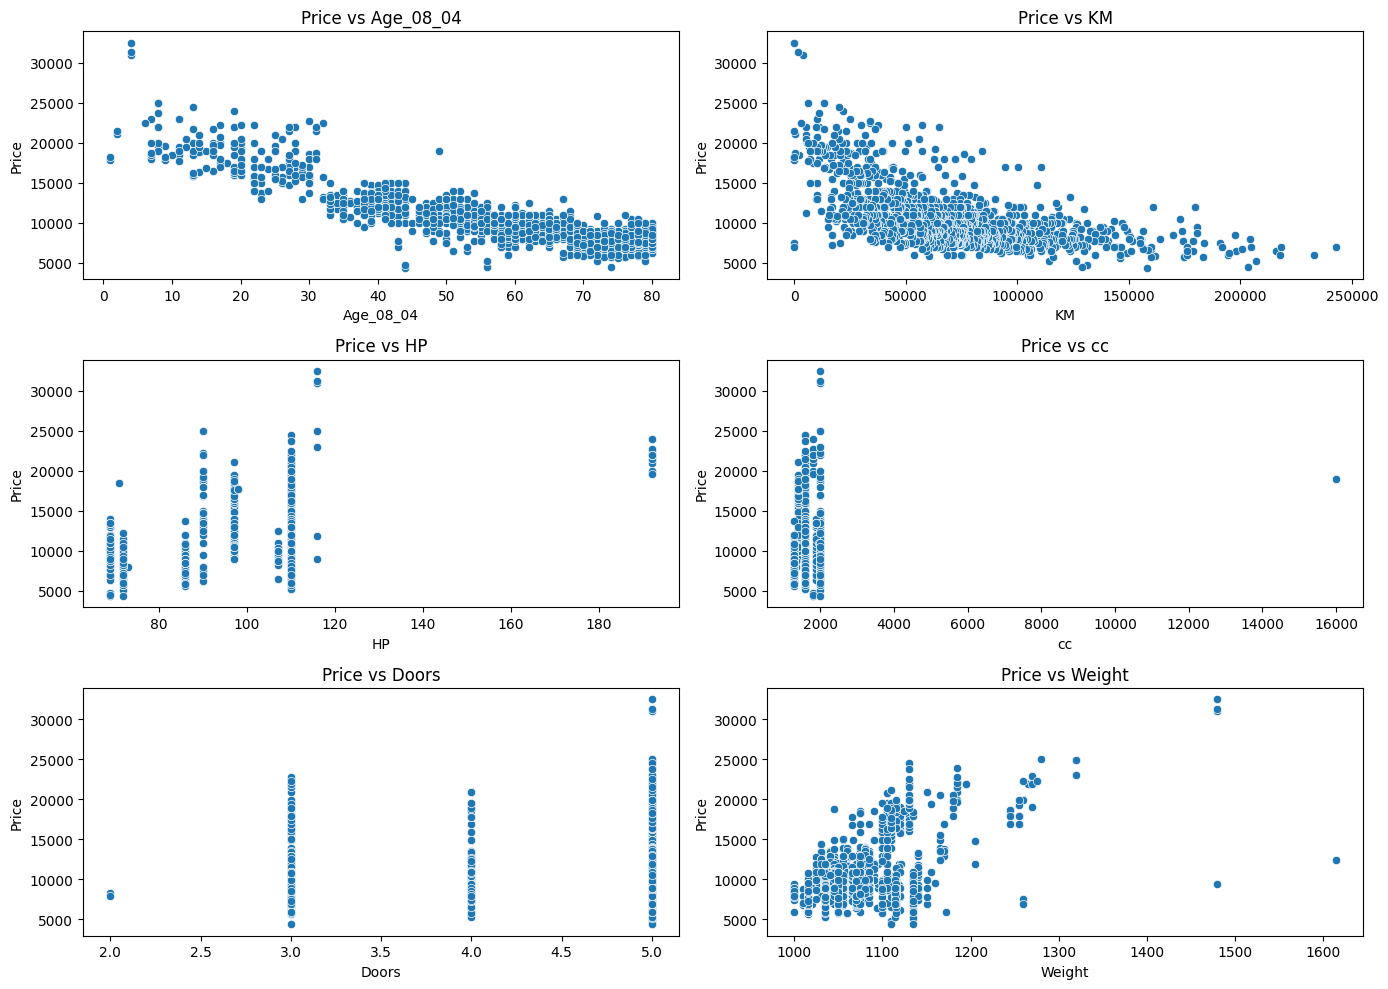

In [183]:
plt.figure(figsize=(14, 10))
# Create scatter plots
for i, col in enumerate(cols[1:]):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')

plt.tight_layout()
plt.show()

### Correlation matrix to see the correlations between all numerical variables.

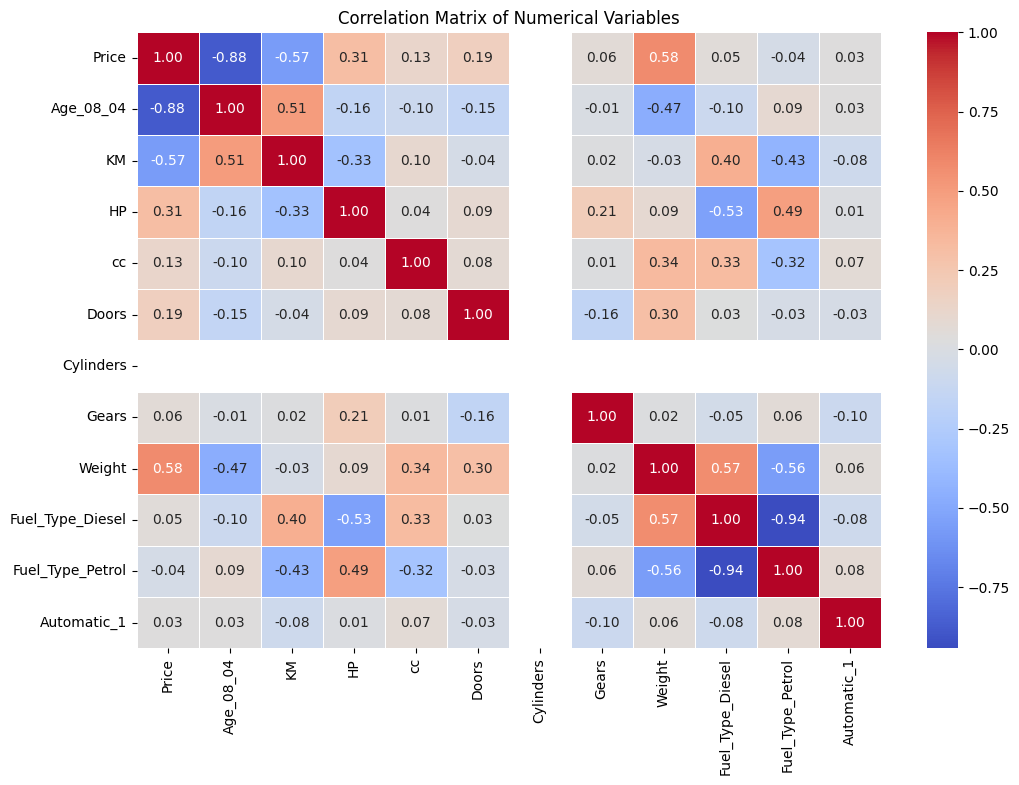

In [184]:
# Compute the correlation matrix
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [185]:
# Define the features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80% training, and 20%testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 9)
X_test shape: (288, 9)
y_train shape: (1148,)
y_test shape: (288,)


## Build a multiple linear regression model using the training dataset. 
## Interpret the coefficients of the model. Build minimum of 3 different models.

In [186]:
# Fit the Linear Regression Models
# Initialize the models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

# Fit the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

LinearRegression()

## Apply Lasso and Ridge methods on the model.

In [187]:
# Fit the Lasso and Ridge Regression Models
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# Fit the Lasso and Ridge models on the training data
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [188]:
# Evaluate the Models
# Make predictions on the test set
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

## Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [189]:
# Calculate evaluation metrics
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

mae1, mse1, rmse1, r21 = evaluate_model(y_test, y_pred1)
mae2, mse2, rmse2, r22 = evaluate_model(y_test, y_pred2)
mae3, mse3, rmse3, r23 = evaluate_model(y_test, y_pred3)
mae_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
mae_ridge, mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)

In [190]:
# Print evaluation metrics
print("Model 1 - MAE:", mae1, "MSE:", mse1, "RMSE:", rmse1, "R-squared:", r21)
print("Model 2 - MAE:", mae2, "MSE:", mse2, "RMSE:", rmse2, "R-squared:", r22)
print("Model 3 - MAE:", mae3, "MSE:", mse3, "RMSE:", rmse3, "R-squared:", r23)
print("Lasso   - MAE:", mae_lasso, "MSE:", mse_lasso, "RMSE:", rmse_lasso, "R-squared:", r2_lasso)
print("Ridge   - MAE:", mae_ridge, "MSE:", mse_ridge, "RMSE:", rmse_ridge, "R-squared:", r2_ridge)

Model 1 - MAE: 997.0024057258056 MSE: 1970126.628813023 RMSE: 1403.611993683804 R-squared: 0.8523452141908858
Model 2 - MAE: 997.0024057258056 MSE: 1970126.628813023 RMSE: 1403.611993683804 R-squared: 0.8523452141908858
Model 3 - MAE: 997.0024057258056 MSE: 1970126.628813023 RMSE: 1403.611993683804 R-squared: 0.8523452141908858
Lasso   - MAE: 996.7430954007937 MSE: 1970575.4102917942 RMSE: 1403.7718512250465 R-squared: 0.8523115794325136
Ridge   - MAE: 996.9424237647607 MSE: 1970379.6468550158 RMSE: 1403.702121838895 R-squared: 0.8523262512855325


## Plotting each model prediction on separate subplots

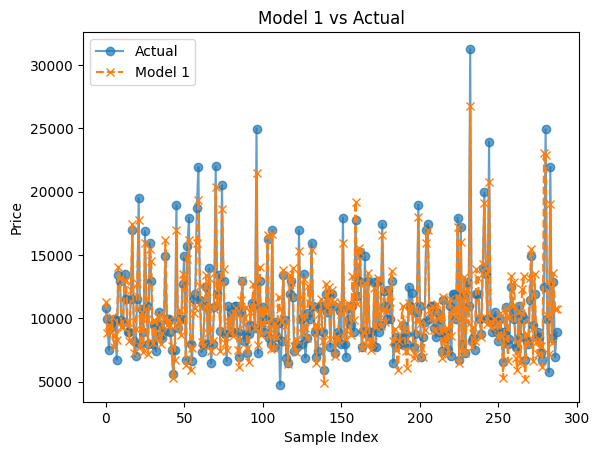

In [191]:
plt.plot(y_test.values, label='Actual', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred1, label='Model 1', linestyle='--', marker='x')
plt.title('Model 1 vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

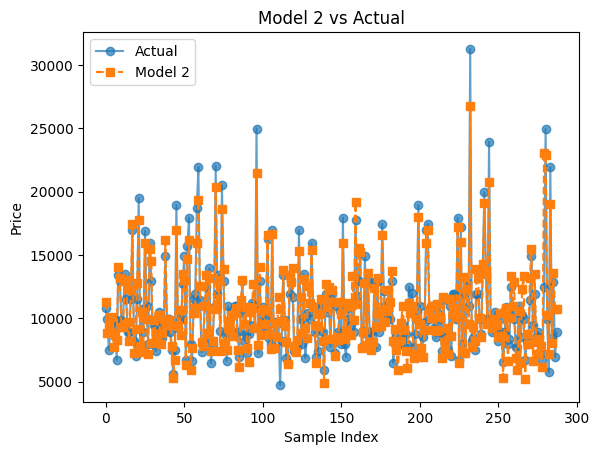

In [192]:
plt.plot(y_test.values, label='Actual', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred2, label='Model 2', linestyle='--', marker='s')
plt.title('Model 2 vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

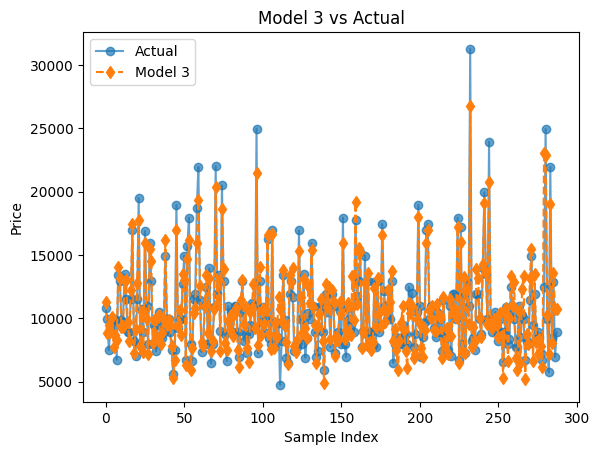

In [193]:
plt.plot(y_test.values, label='Actual', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred3, label='Model 3', linestyle='--', marker='d')
plt.title('Model 3 vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

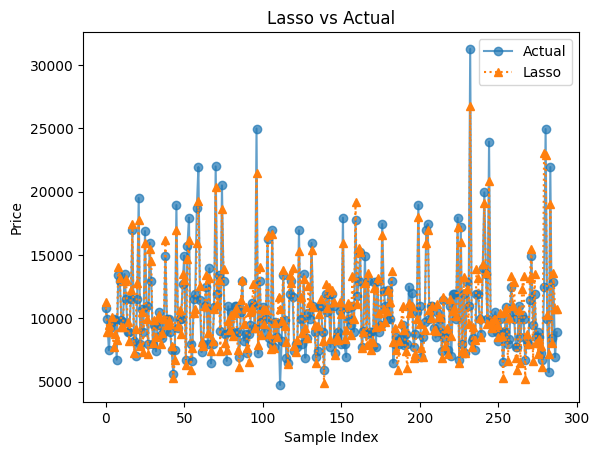

In [194]:
plt.plot(y_test.values, label='Actual', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred_lasso, label='Lasso', linestyle=':', marker='^')
plt.title('Lasso vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

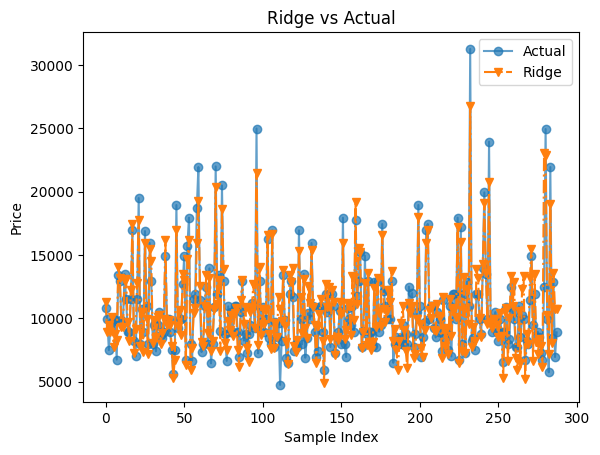

In [195]:
plt.plot(y_test.values, label='Actual', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred_ridge, label='Ridge', linestyle='-.', marker='v')
plt.title('Ridge vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Interview Questions:

## 1.What is Normalization & Standardization and how is it helpful?

In [197]:
"""Normalization and standardization are techniques used in data preprocessing to prepare data for machine learning models. 
   Both methods aim to adjust the data so that it is more suitable for the model training process, but they do so in different ways.

Normalization: 
   Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1]. It is also known as min-max scaling.
   Normalization uses when the data has a varying range and want to preserve the relationships of the data and algorithms that do not assume any specific data distribution,
   such as K-Nearest (KNN)or Neural Networks. 

Standardization:
   Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It is also known as Z-score normalization.
   Standardization uses When the data follows a Gaussian distribution (normal distribution).And When using algorithms that assume a Gaussian distribution of the data, 
   such as Linear Regression, Logistic Regression, and Support Vector Machines (SVM). 

These Techniques Help:
   1.Improved Model Performance
   2.Faster Convergence
   3.Better Interpretation
   4.Reduced Impact of Outliers """

'Normalization and standardization are techniques used in data preprocessing to prepare data for machine learning models. \n   Both methods aim to adjust the data so that it is more suitable for the model training process, but they do so in different ways.\n\nNormalization: \n   Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1]. It is also known as min-max scaling.\n   Normalization uses when the data has a varying range and want to preserve the relationships of the data and algorithms that do not assume any specific data distribution,\n   such as K-Nearest (KNN)or Neural Networks. \n\nStandardization:\n   Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It is also known as Z-score normalization.\n   Standardization uses When the data follows a Gaussian distribution (normal distribution).And When using algorithms that assume a Gaussian distribution of the data, \n   such as Linear Regression, Logistic Regression, and Suppo

## 2.What techniques can be used to address multicollinearity in multiple linear regression?

In [198]:
"""Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. 
   In other way, multicollinearity exists when there are linear relationships among the independent variables, 
   this causes issues in regression analysis because it does not follow the assumption of independence among predictors

   Multicollinearity in regression analysis is crucial for ensuring that your models provide reliable and interpretable results. 
   Here are some effective strategies you can consider to address this issue:

   1.Remove Highly Correlated Predictors
   2.Principal Component Analysis (PCA)
   3.Ridge Regression
   4.Increase Sample Size """

'Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. \n   In other way, multicollinearity exists when there are linear relationships among the independent variables, \n   this causes issues in regression analysis because it does not follow the assumption of independence among predictors\n\n   Multicollinearity in regression analysis is crucial for ensuring that your models provide reliable and interpretable results. \n   Here are some effective strategies you can consider to address this issue:\n\n   1.Remove Highly Correlated Predictors\n   2.Principal Component Analysis (PCA)\n   3.Ridge Regression\n   4.Increase Sample Size '